In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
housing = pd.read_csv('Housing.csv')

In [185]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [186]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [187]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [188]:
housing.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


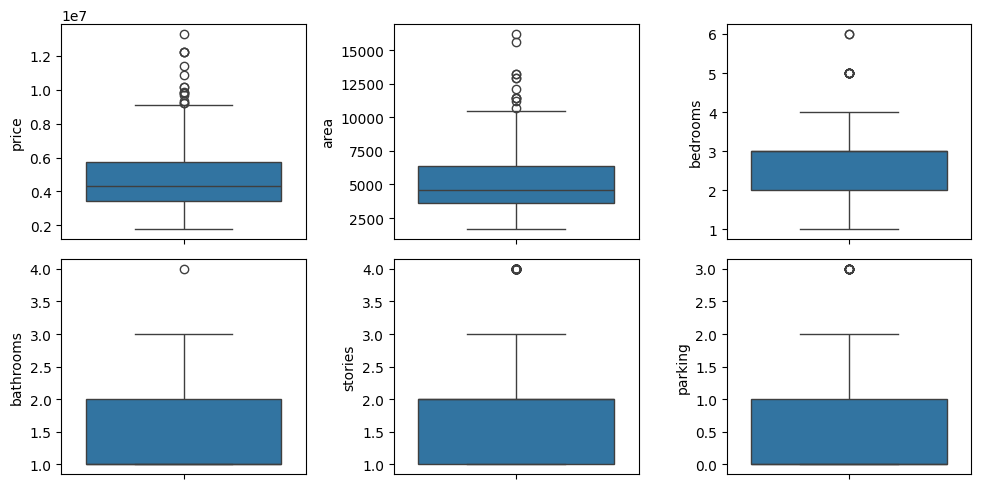

In [189]:
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

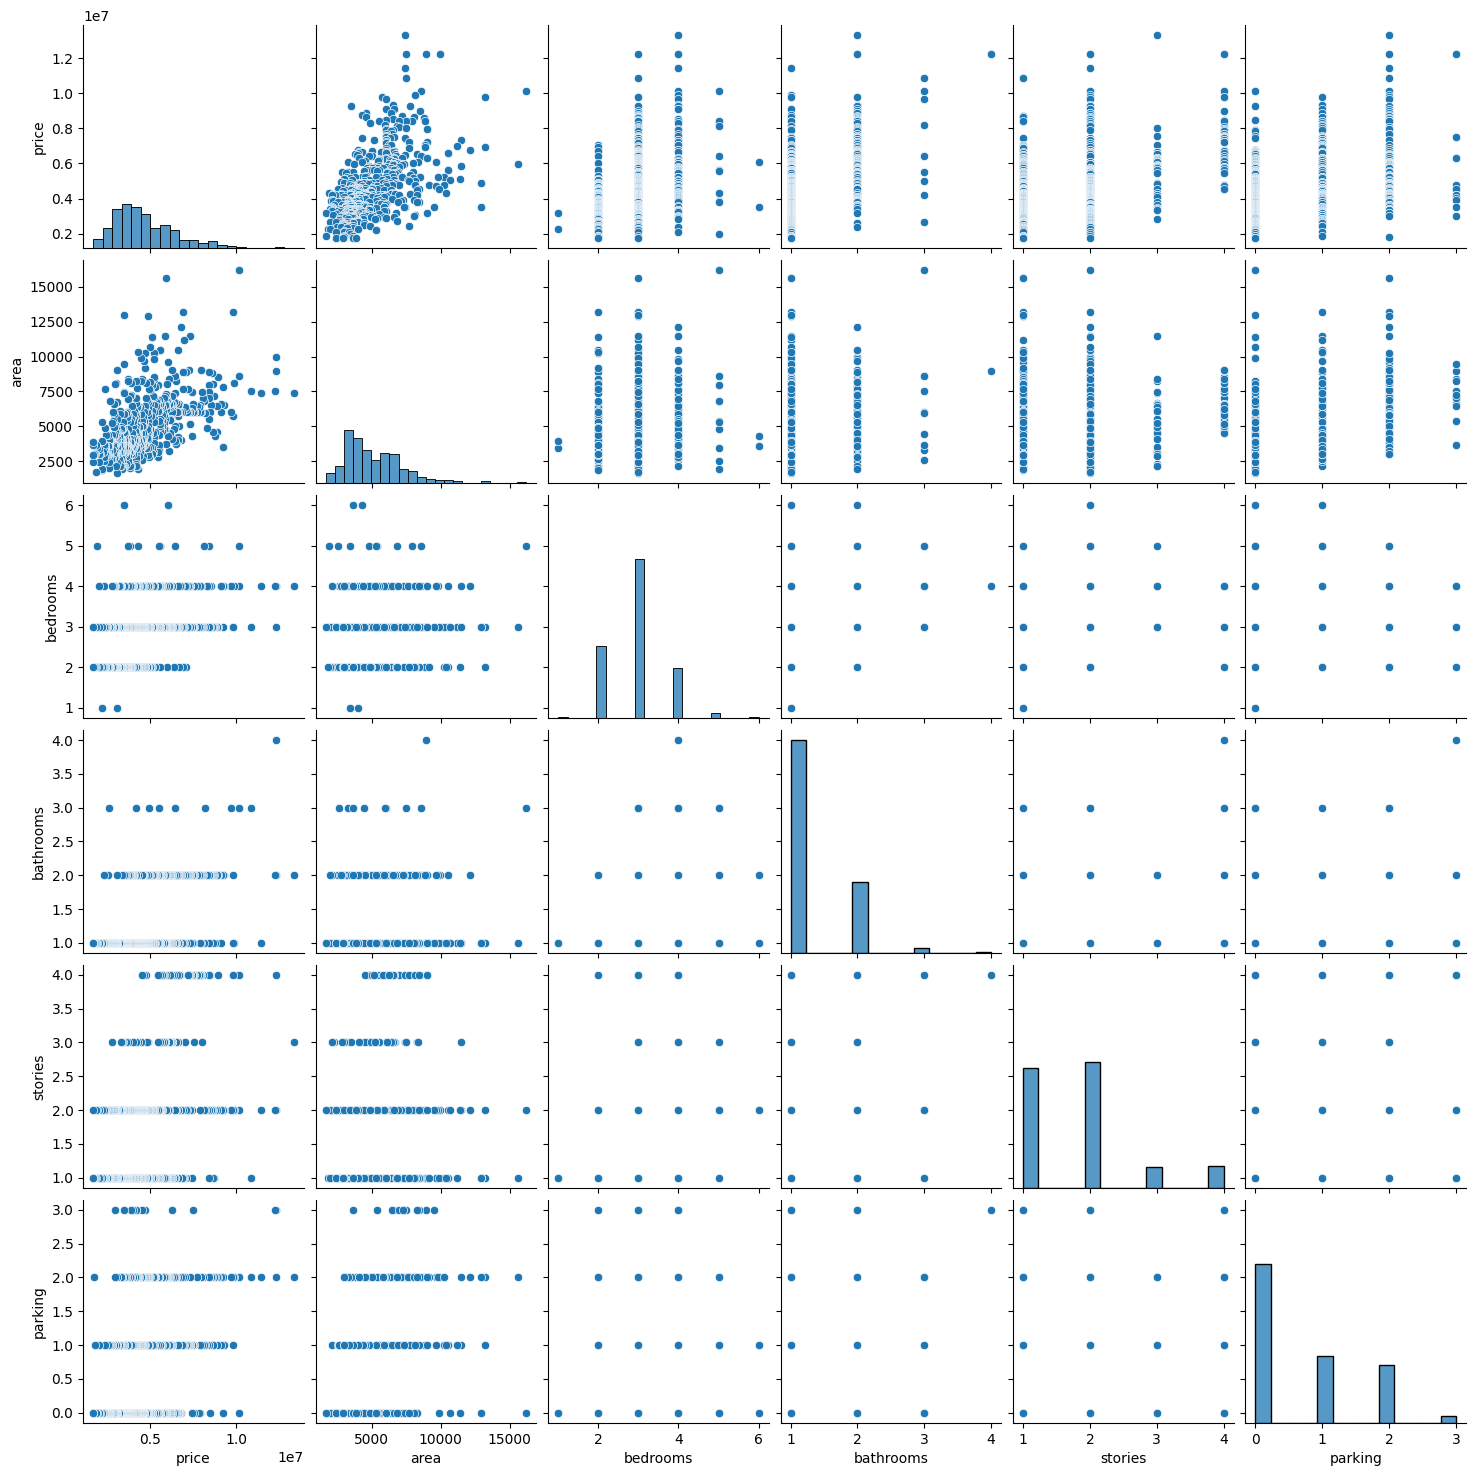

In [190]:
sns.pairplot(housing)
plt.show()

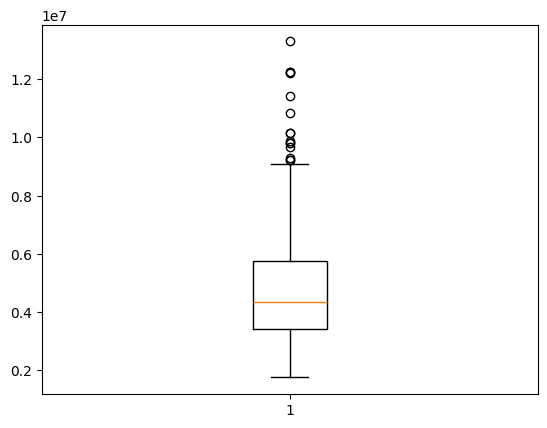

In [191]:
plt.boxplot(housing['price'])

Q1 = housing['price'].quantile(0.25)
Q3 = housing['price'].quantile(0.75)
IQR = Q3 - Q1

housing = housing[(housing['price'] >= Q1 - 1.5 * IQR) & (housing['price'] <= Q3 + 1.5 * IQR)]

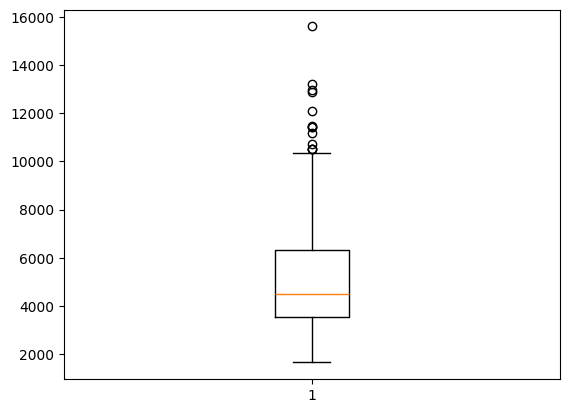

In [192]:
plt.boxplot(housing['area'])

Q1 = housing['area'].quantile(0.25)
Q3 = housing['area'].quantile(0.75)
IQR = Q3 - Q1

housing = housing[(housing['area'] >= Q1 - 1.5 * IQR) & (housing['area'] <= Q3 + 1.5 * IQR)]

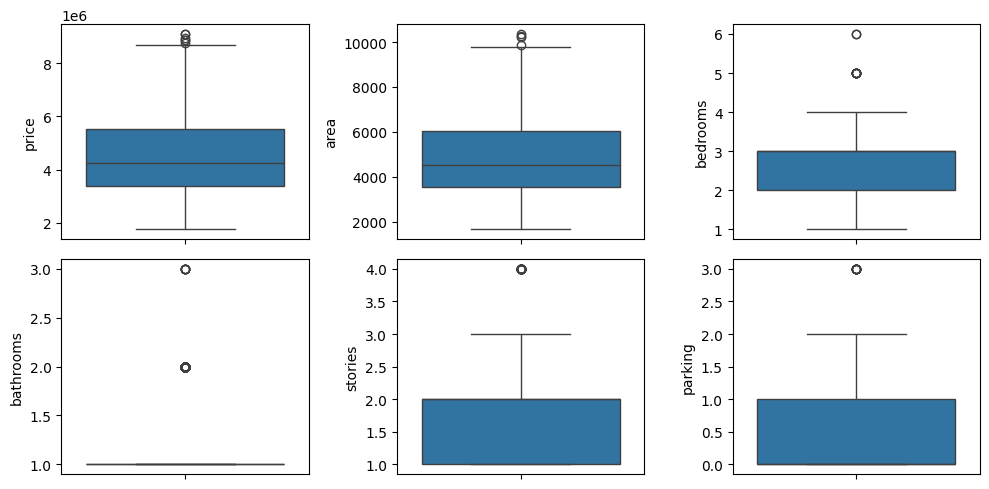

In [193]:
fig, axs = plt.subplots(2,3, figsize = (10,5))

plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt6 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

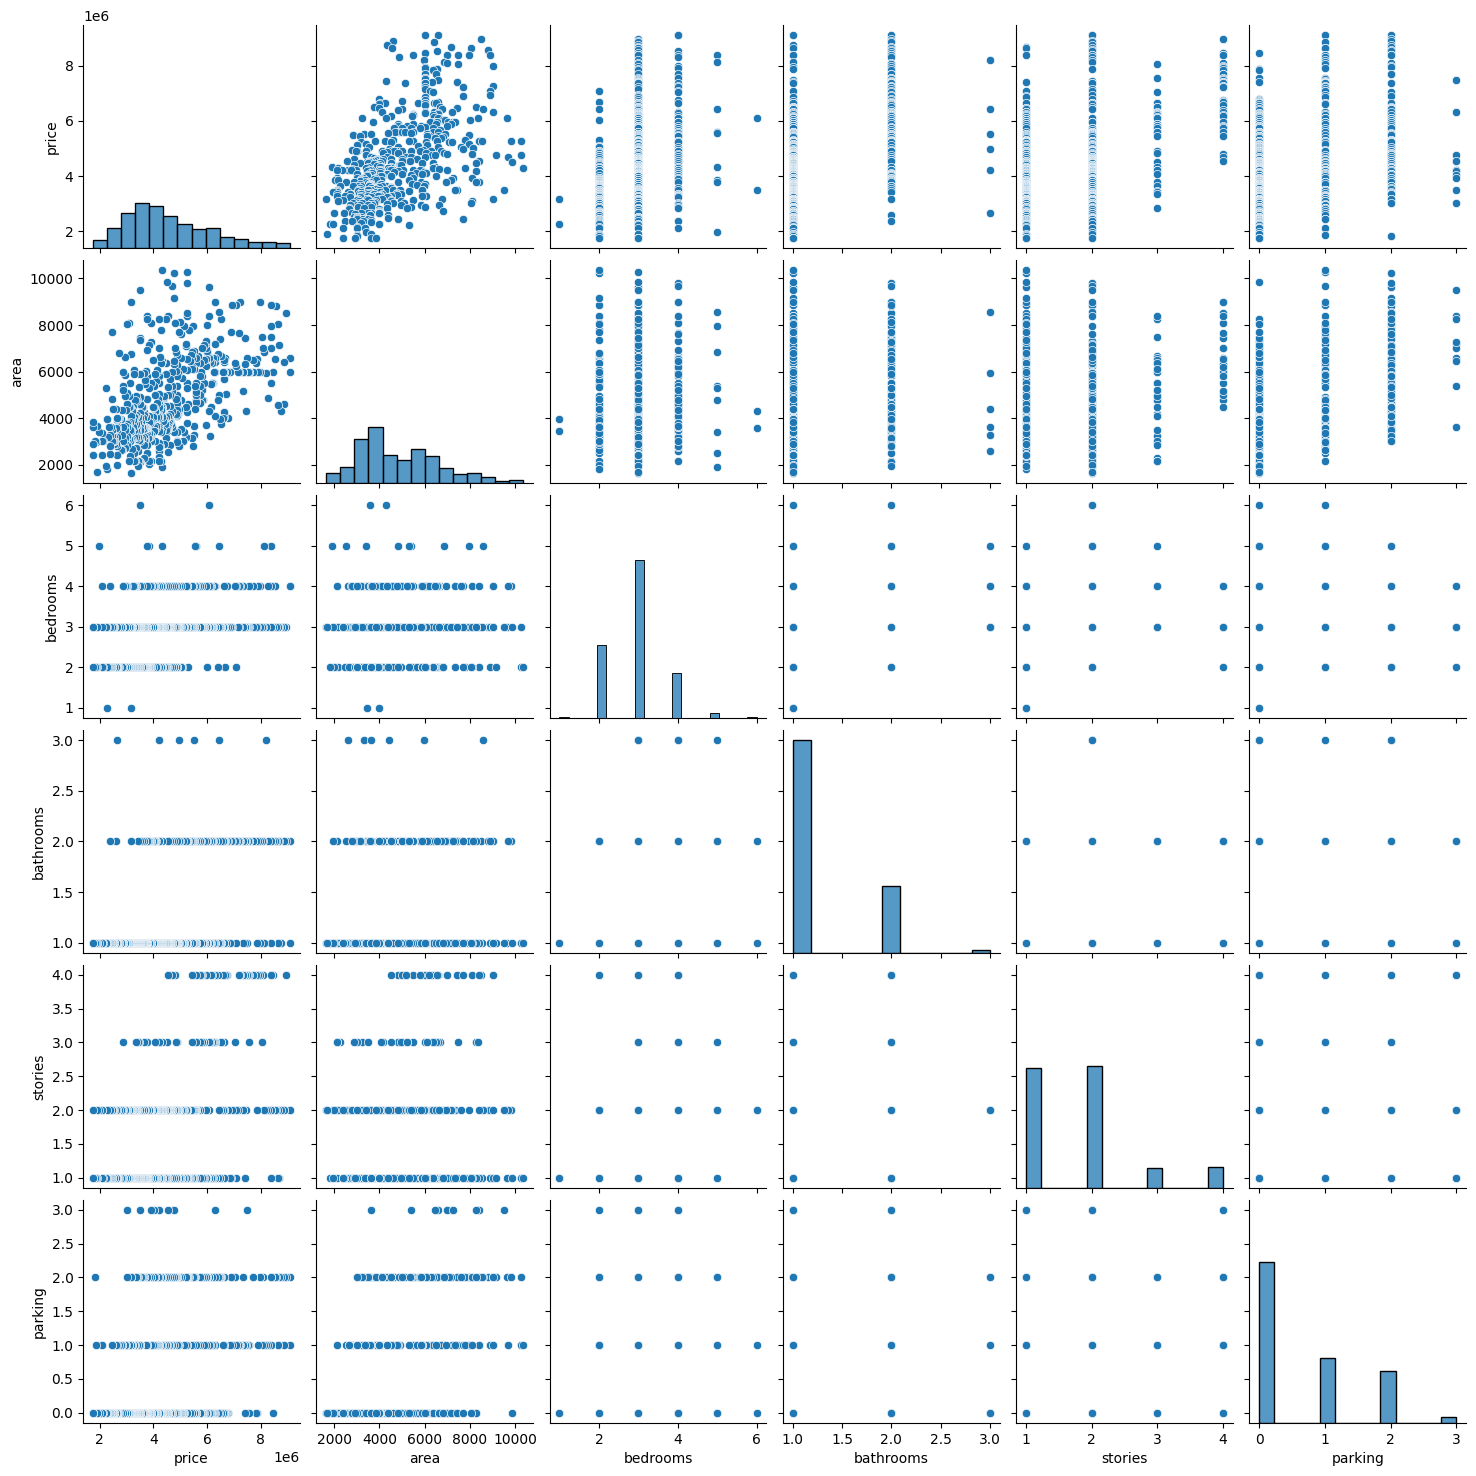

In [194]:
sns.pairplot(housing)
plt.show()

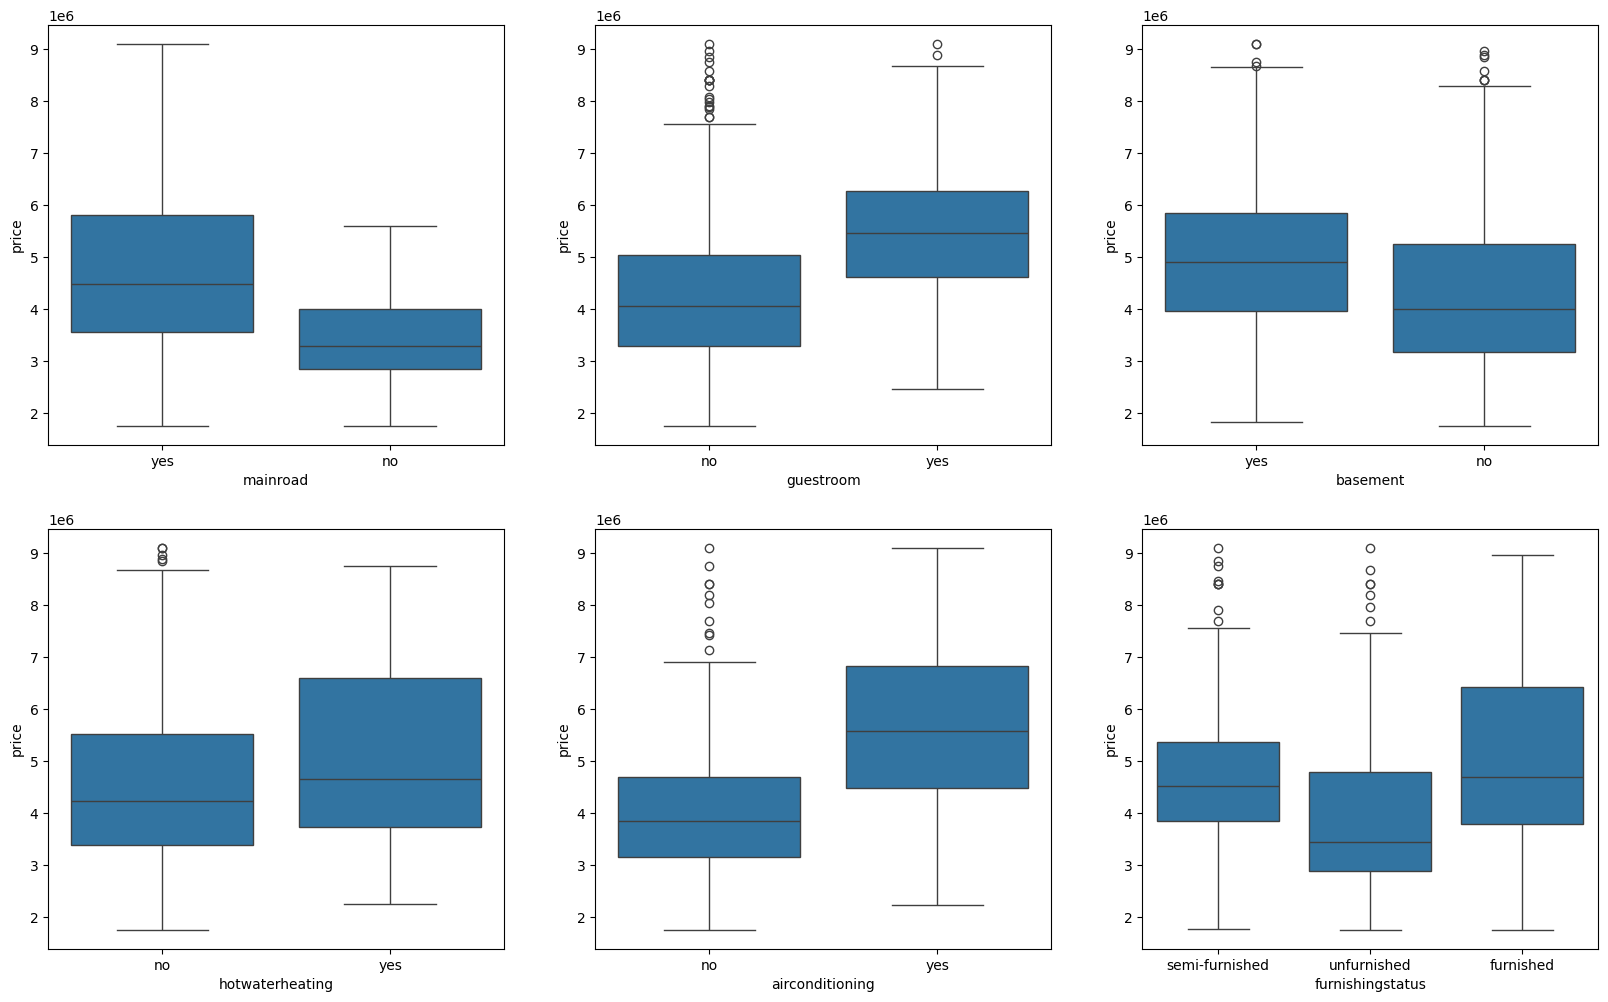

In [195]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [196]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [197]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [198]:

status = pd.get_dummies(housing['furnishingstatus'], dtype = int)
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
16,0,0,1
17,1,0,0
18,1,0,0
19,0,1,0


In [199]:
# by looking at above table
# we can say, we dont need 3 columns, we can decide status using 2 columns only.

# 00 -> furnished
# 10 -> semi-furnished
# 01 -> unfurnished

status = pd.get_dummies(housing['furnishingstatus'], drop_first = True, dtype = int)
status.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [200]:
housing = pd.concat([housing, status], axis = 1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished,1,0


In [201]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [202]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(
    housing,
    train_size = 0.7,
    test_size = 0.3,
    random_state = 100 # avoid over-fitting
)

In [203]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,5600000,6360,3,1,3,1,0,0,0,0,0,1,1,0
236,4620000,2870,2,1,2,1,1,1,0,0,0,1,1,0
356,3773000,2520,5,2,1,0,0,1,0,1,1,0,0,0
425,3360000,3185,2,1,1,1,0,1,0,0,2,0,0,0
516,2450000,3240,2,1,1,0,1,0,0,0,1,0,0,1


In [204]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train['price']

X_test = df_test.drop('price', axis = 1)
y_test = df_test['price']

In [205]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,6360,3,1,3,1,0,0,0,0,0,1,1,0
236,2870,2,1,2,1,1,1,0,0,0,1,1,0
356,2520,5,2,1,0,0,1,0,1,1,0,0,0
425,3185,2,1,1,1,0,1,0,0,2,0,0,0
516,3240,2,1,1,0,1,0,0,0,1,0,0,1


In [206]:
y_train.head()

,price
148,5600000
236,4620000
356,3773000
425,3360000
516,2450000


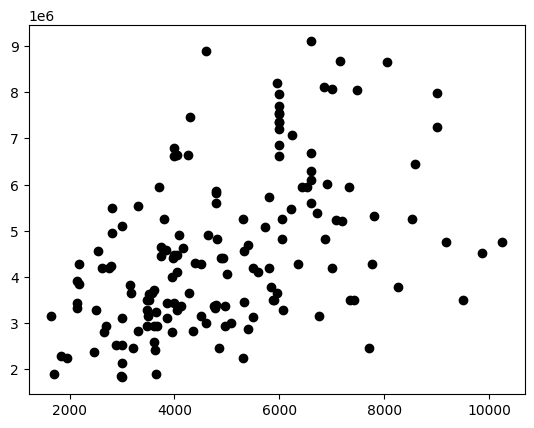

In [207]:
plt.scatter(X_test['area'], y_test, color='black', label='Actual Data')


In [208]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [209]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
148,0.523810,0.526907,0.4,0.0,0.666667,1,0,0,0,0,0.000000,1,1,0
236,0.390476,0.114134,0.2,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
356,0.275238,0.072738,0.8,0.5,0.000000,0,0,1,0,1,0.333333,0,0,0
425,0.219048,0.151390,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0
516,0.095238,0.157895,0.2,0.0,0.000000,0,1,0,0,0,0.333333,0,0,1


In [210]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.383701,0.350081,0.390582,0.127424,0.268698,0.875346,0.168975,0.349030,0.038781,0.313019,0.218837,0.207756,0.476454,0.304709
std,0.209712,0.207184,0.149146,0.224465,0.287833,0.330784,0.375250,0.477325,0.193341,0.464366,0.287286,0.406264,0.500138,0.460923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.237143,0.189829,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.338095,0.295092,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.514286,0.491425,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


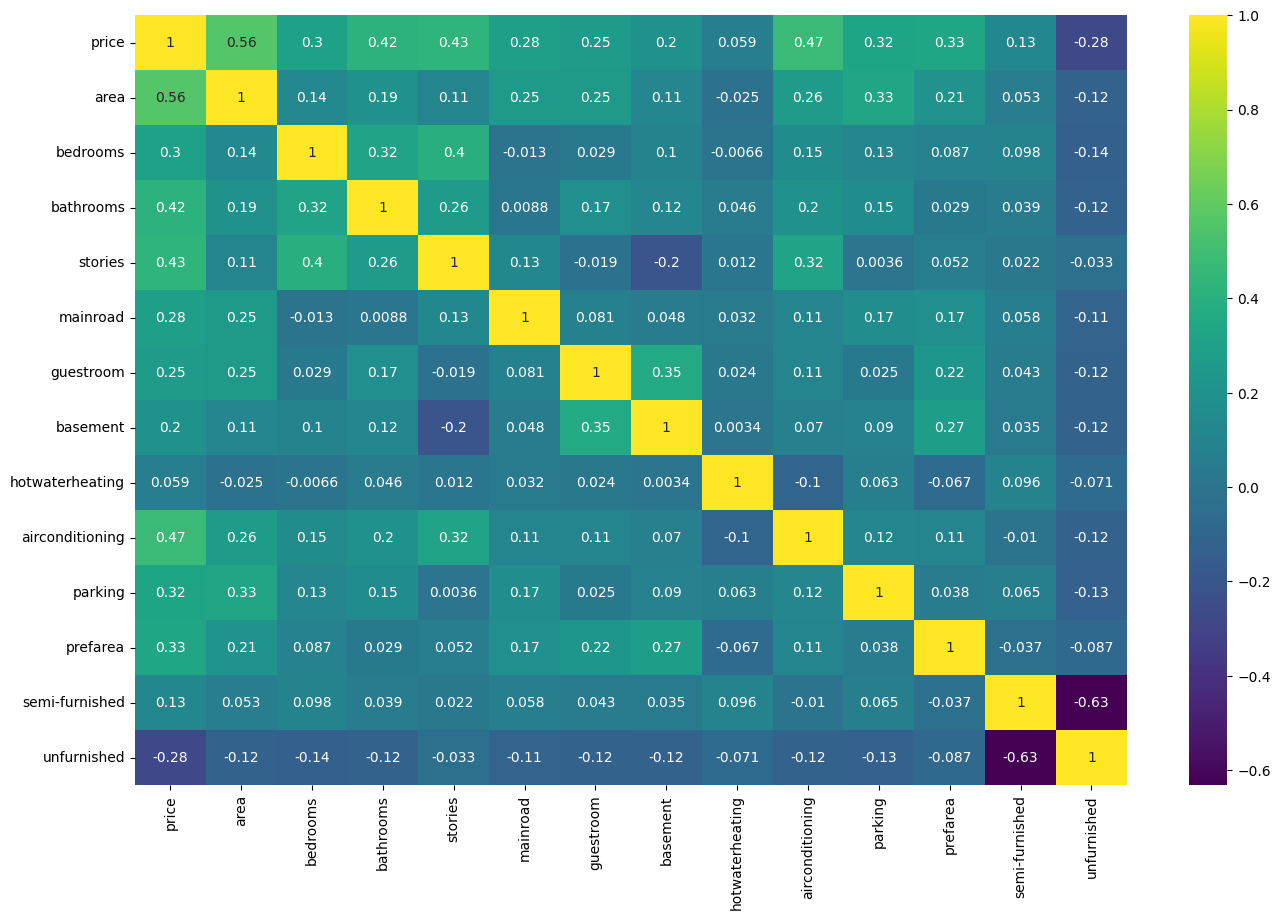

In [211]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')
plt.show()


In [212]:
y_train = df_train.pop('price')
X_train = df_train

In [213]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
y_pred = model.predict(X_test)

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 23761085139028.824
Mean Absolute Error: 4564186.080871653
R-squared: -7.108838980662826


In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
model.fit(X_train, y_train)

rfe = RFE(model, n_features_to_select=6)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [217]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 7),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 5),
 ('guestroom', False, 6),
 ('basement', False, 4),
 ('hotwaterheating', False, 2),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 3)]

In [218]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking',
       'prefarea'],
      dtype='object')

In [219]:
X_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [220]:
X_train_rfe = X_train[col]

In [221]:
X_train_rfe.head()

,area,bathrooms,stories,airconditioning,parking,prefarea
148,0.526907,0.0,0.666667,0,0.000000,1
236,0.114134,0.0,0.333333,0,0.000000,1
356,0.072738,0.5,0.000000,1,0.333333,0
425,0.151390,0.0,0.000000,0,0.666667,0
516,0.157895,0.0,0.000000,0,0.333333,0


In [222]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [223]:
X_train_rfe.head()

,const,area,bathrooms,stories,airconditioning,parking,prefarea
148,1.0,0.526907,0.0,0.666667,0,0.000000,1
236,1.0,0.114134,0.0,0.333333,0,0.000000,1
356,1.0,0.072738,0.5,0.000000,1,0.333333,0
425,1.0,0.151390,0.0,0.000000,0,0.666667,0
516,1.0,0.157895,0.0,0.000000,0,0.333333,0


In [224]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [225]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     92.83
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.31e-69
Time:                        11:49:16   Log-Likelihood:                 222.77
No. Observations:                 361   AIC:                            -431.5
Df Residuals:                     354   BIC:                            -404.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1097      0.015     

In [226]:
y_train_price = lm.predict(X_train_rfe)

In [227]:
res = (y_train_price - y_train)

Text(0.5, 9.444444444444438, 'Errors')

<Figure size 640x480 with 0 Axes>

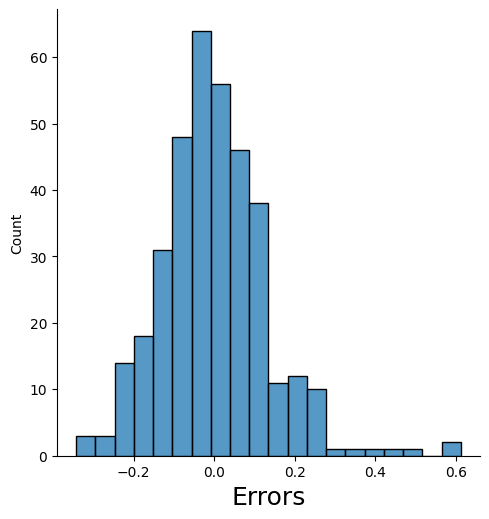

In [228]:
fig = plt.figure()

sns.displot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [229]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [230]:
y_test = df_test.pop('price')
X_test = df_test

In [231]:
X_test = sm.add_constant(X_test)

In [232]:
X_test_rfe = X_test[X_train_rfe.columns]

In [233]:
y_pred = lm.predict(X_test_rfe)

In [235]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 23776715667344.617
Mean Absolute Error: 4565790.88551705
R-squared: -7.1141731409738505


**What we have learnt**
- Data Preprocessing
  - Handling missing values
  - Outlier Detection and Treatment
  - Feature Scaling and Normalization
  - Feature Engineering
  - One Hot Encoding
- Model Selection and Training
  - Linear Regression
  - Feature Engineering
  - Model Fitting and Evaluation
- Model Evaluation
  - MSE - Mean Squared Error
  - MAE - MEAN Absolute Error
  - R-Squared -
  - Residual Analysis
- Model Interpretation
  - Coefficient Interpretation
  - Feature Importance
  - Model Diagnostics